In [1]:
import os
os.chdir("C:\\Users\\PRINCE OYEKAN\\Documents")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [3]:
df=pd.read_csv("Softwaredefinednetworking(sdn).csv")
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [4]:
df.shape

(104345, 23)

In [5]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

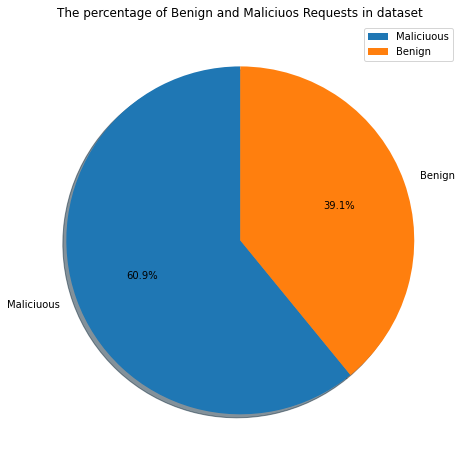

In [6]:
labels = ["Maliciuous",'Benign']
sizes = [dict(df.label.value_counts())[0], dict(df.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
object_df = df.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [8]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

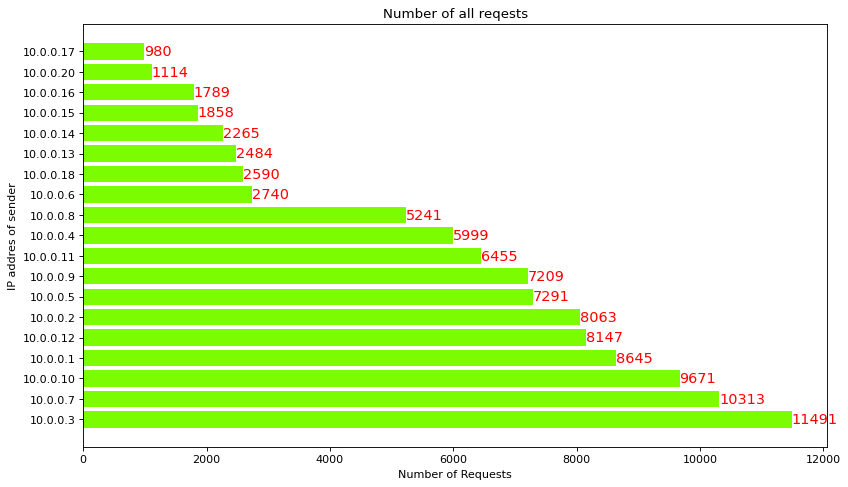

In [9]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

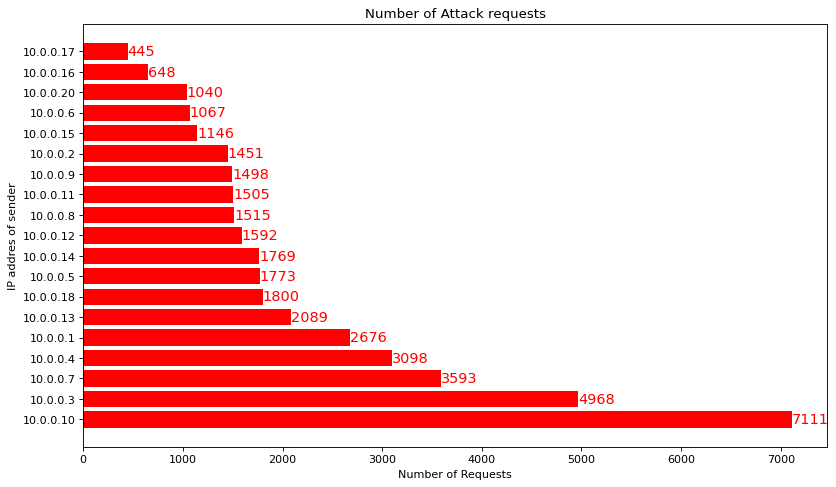

In [10]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color='red')

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

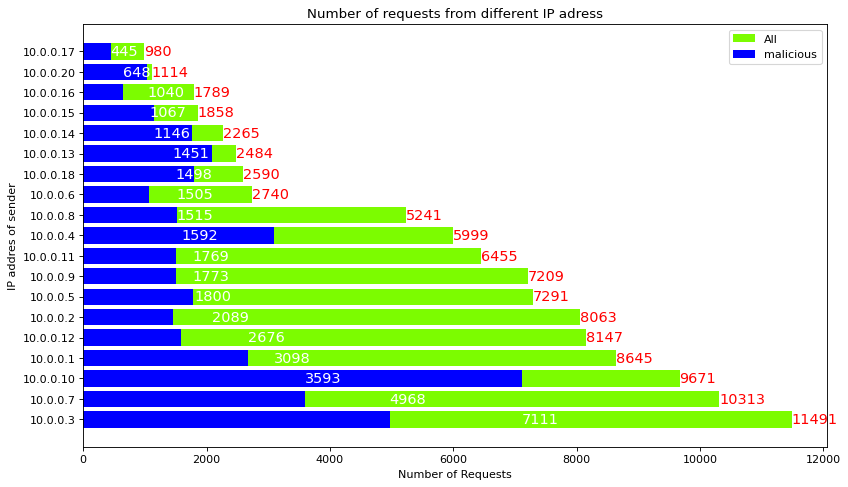

In [11]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

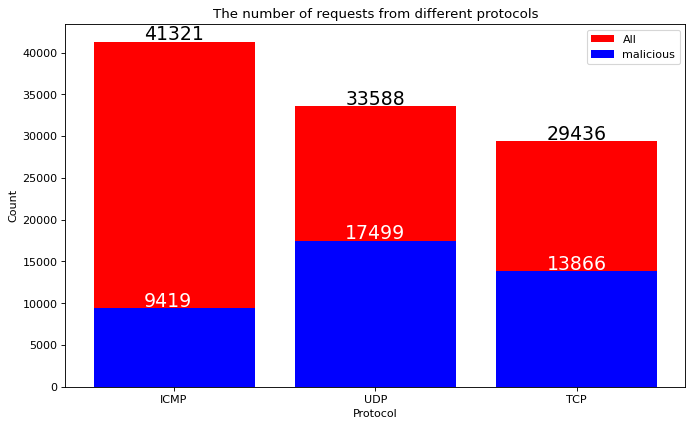

In [12]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(df.Protocol.value_counts()).keys()), dict(df.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(df[df.label == 1].Protocol.value_counts()).keys()), dict(df[df.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [13]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
        
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()
        
        
        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)
        
        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)
        
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']
        
        dtree = DecisionTreeClassifier(criterion=criterion, 
                                       max_depth=max_depth, 
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))


In [14]:
df1 =df .copy()
df1 = df.dropna()
X = df1.drop(['dt','src','dst','label'], axis=1)
y = df1.label
X = pd.get_dummies(X)
M = Model(X)
## Logistic Regression(Without FS)
M.LogisticRegression()

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 11.100637912750244 seconds --- time for LogisticRegression


In [15]:
## Support Vector Machine(Without FS)
M.SupportVectorMachine()

Accuracy: 78.40%
######################################################################
Accuracy: 96.53%
######################################################################
Accuracy: 96.67%
######################################################################
Accuracy: 54.52%
######################################################################
Accuracy of SVM model 97.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18750
           1       0.97      0.95      0.96     12402

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 11581.258934020996 seconds ---


In [ ]:
## Decision Tree(Without FS)
M.DecisionTree()

In [ ]:
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=2, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=2, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=7, total=   0.4s[CV] criterion=gini, max_depth=2, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=8, total=   0.4s[CV] criterion=gini, max_depth=2, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=8, total=   0.4s[CV] criterion=gini, max_depth=2, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=2, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=8, total=   0.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=2 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=2 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=3 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=3 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=3, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=4 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=4, total=   0.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=5, total=   0.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=6 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=11 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=11 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=4, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=2 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=3 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=4 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=4, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=5, total=   0.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=5, total=   0.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=6 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=11 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=2, total=   0.3s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=2 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=3 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=3, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=4 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=4, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=6 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=6 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=11 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=8, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=2 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=3 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=4 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=7 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9 ...................
[CV] .... criterion=gini, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=10 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=11 ..................
[CV] ... criterion=gini, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=2 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=3 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=4 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=4, total=   0.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=4 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=4, total=   0.6s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=5, total=   0.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=6 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV] ... criterion=gini, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=11 .................
[CV] .. criterion=gini, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=3, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=5, total=   0.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   56.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=9, total=   0.5s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=5, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=6, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=7, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=8, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=2, max_leaf_nodes=9, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=11, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=5, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=6, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=3, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=3, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=7, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=8, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=4, max_leaf_nodes=9, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=10, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=4, max_leaf_nodes=11, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=5, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=6, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=11, total=   0.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.4min finished
criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 82.90441250801086 seconds ---
 

In [ ]:
## Random Forest Classification(Without FS)
M.RandomForest()

In [ ]:
M.KNearetsNeighbor()

In [ ]:
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=8, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=9, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=2 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=3 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=4 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=4 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=6 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=7 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=8 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=8 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=9 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=11 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=11, total=   0.4s

[CV] criterion=entropy, max_depth=6, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=8, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=9, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=2 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=2 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=3 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=4 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=6 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=7 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=8 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=9 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=9 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=11 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=11, total=   0.5s

[CV] criterion=entropy, max_depth=6, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=10, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=2, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=2, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=8, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=9, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=2 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=2 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=3 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=4 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=6 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=6 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=7 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=8 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=9 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=11 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=11, total=   0.4s

[CV] criterion=entropy, max_depth=7, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=2, total=   0.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=3, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=7, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=4, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=9, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=8, max_leaf_nodes=9, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=11, total=   0.5s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=2 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=2, total=   0.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=3 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=4 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=7 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9 ................
[CV] . criterion=entropy, max_depth=9, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=10 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=11 ...............
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=3 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=3 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=3, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=4 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=4, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=6 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=6, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=7 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=7 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=7, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=8 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=8, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=9 ...............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=9, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=11 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=11, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=11 ..............
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=11, total=   0.3s

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.0min finished
Accuracy of KNN model 98.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19002
           1       0.98      0.98      0.98     12150

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 227.98016905784607 seconds ---


In [ ]:
#Summary of the accuracy of the algorithms used for the analysis
#LogisticRegression-76.64%
#SupportVectorMachine(SVM)-97%
#DecisionTree-98.22%
#KNNeigbhors-98%

#Decision Tree Algorithms has the highest precision of 98.22%